### Download Required packages

In [21]:
import pandas
import numpy
import matplotlib
import seaborn
import scipy
import sklearn

In [22]:
from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.linear_model import LinearRegression
from scipy import stats
from IPython.display import display, HTML

# figures inline in notebook
%matplotlib inline

np.set_printoptions(suppress=True)

DISPLAY_MAX_ROWS = 20  # number of max rows to print for a DataFrame
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

In [23]:
patQ30Row97Dn5Job1435=pd.read_csv("/data/10/artifacts-5datanodes-results-bkp/artifacts/Row97Query30sf1000datanodes5--1435--2019-12-24-11-13-26--patResults/instruments/MEMORY.csv",encoding='UTF-8')

In [24]:
patQ30Row97Dn5Job1435.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 29 columns):
HostName     2598 non-null object
TimeStamp    2598 non-null object
AM           2598 non-null object
pgpgin/s     2598 non-null object
pgpgout/s    2598 non-null object
fault/s      2598 non-null object
majflt/s     2598 non-null object
pgfree/s     2598 non-null object
pgscank/s    2598 non-null object
pgscand/s    2598 non-null object
pgsteal/s    2598 non-null object
%vmeff       2598 non-null object
AM.1         2598 non-null object
kbmemfree    2598 non-null object
kbmemused    2598 non-null object
%memused     2598 non-null object
kbbuffers    2598 non-null object
kbcached     2598 non-null object
kbcommit     2598 non-null object
%commit      2598 non-null object
kbactive     2598 non-null object
kbinact      2598 non-null object
kbdirty      2598 non-null object
AM.2         2598 non-null object
kbswpfree    2598 non-null object
kbswpused    2598 non-null object
%swpused 

In [25]:
#Dropping duplicate rows
'''patQ30Row97Dn5Job1435.drop_duplicates(subset ="HostName",keep = False, inplace = False)
patQ30Row97Dn5Job1435.drop_duplicates(subset ="TimeStamp",keep = False, inplace = False)
patQ30Row97Dn5Job1435.drop_duplicates(subset ="CPU", keep = False, inplace = False)
patQ30Row97Dn5Job1435.drop_duplicates(subset ="%user", keep = False, inplace = False)
patQ30Row97Dn5Job1435.drop_duplicates(subset ="%nice", keep = False, inplace = False)
patQ30Row97Dn5Job1435.drop_duplicates(subset ="%system", keep = False, inplace = False)
patQ30Row97Dn5Job1435.drop_duplicates(subset ="%iowait", keep = False, inplace = False)
patQ30Row97Dn5Job1435.drop_duplicates(subset ="%steal", keep = False, inplace = False)
patQ30Row97Dn5Job1435.drop_duplicates(subset ="%idle", keep = False, inplace = False)
'''
patQ30Row97Dn5Job1435.drop_duplicates(subset ="kbmemfree", keep = False, inplace =True)

In [26]:
patQ30Row97Dn5Job1435

,HostName,TimeStamp,AM,pgpgin/s,pgpgout/s,fault/s,majflt/s,pgfree/s,pgscank/s,pgscand/s,...,%commit,kbactive,kbinact,kbdirty,AM.2,kbswpfree,kbswpused,%swpused,kbswpcad,%swpcad
0,bdw21-13,0,AM,0.00,223.20,1693.60,1.80,885.20,0.00,0.00,...,34.22,48564964,118704792,2196,AM,2096500,648,0.03,44,6.79
1,bdw21-13,1,AM,0.00,3372.80,52024.40,2.40,35478.00,0.00,0.00,...,36.02,48687172,118704464,340,AM,2096500,648,0.03,44,6.79
2,bdw21-13,2,AM,0.00,2048.80,44638.20,0.00,42644.20,0.00,0.00,...,36.00,48605652,118704600,212,AM,2096500,648,0.03,44,6.79
3,bdw21-13,3,AM,0.00,47.20,48107.80,0.00,34013.20,0.00,0.00,...,36.01,48794136,118704596,2136,AM,2096500,648,0.03,44,6.79
4,bdw21-13,4,AM,0.00,88.80,63913.60,0.20,41705.60,0.00,0.00,...,36.44,48943672,118704904,3252,AM,2096500,648,0.03,44,6.79
5,bdw21-13,5,AM,0.00,297.60,32168.20,0.00,2592.00,0.00,0.00,...,37.38,49457084,118772988,74464,AM,2096500,648,0.03,44,6.79
6,bdw21-13,6,AM,0.00,5223.20,31898.00,0.00,50152.40,0.00,0.00,...,36.45,49254996,118699924,2180,AM,2096500,648,0.03,44,6.79
7,bdw21-13,7,AM,0.00,300.80,10494.60,0.00,6811.60,0.00,0.00,...,36.46,49341876,118699600,5404,AM,2096500,648,0.03,44,6.79
8,bdw21-13,8,AM,0.00,1208.80,5900.00,0.00,6050.80,0.00,0.00,...,36.46,49353816,118699620,1400,AM,2096500,648,0.03,44,6.79
9,bdw21-13,9,AM,0.00,106.40,3570.00,0.00,4028.60,0.00,0.00,...,36.45,49353192,118699632,1908,AM,2096500,648,0.03,44,6.79


In [27]:
patQ30Row97Dn5Job1435.drop(["AM","AM.1","AM.2"],inplace=True,axis=1)

In [28]:
patQ30Row97Dn5Job1435

,HostName,TimeStamp,pgpgin/s,pgpgout/s,fault/s,majflt/s,pgfree/s,pgscank/s,pgscand/s,pgsteal/s,...,kbcommit,%commit,kbactive,kbinact,kbdirty,kbswpfree,kbswpused,%swpused,kbswpcad,%swpcad
0,bdw21-13,0,0.00,223.20,1693.60,1.80,885.20,0.00,0.00,0.00,...,91015136,34.22,48564964,118704792,2196,2096500,648,0.03,44,6.79
1,bdw21-13,1,0.00,3372.80,52024.40,2.40,35478.00,0.00,0.00,0.00,...,95783244,36.02,48687172,118704464,340,2096500,648,0.03,44,6.79
2,bdw21-13,2,0.00,2048.80,44638.20,0.00,42644.20,0.00,0.00,0.00,...,95724296,36.00,48605652,118704600,212,2096500,648,0.03,44,6.79
3,bdw21-13,3,0.00,47.20,48107.80,0.00,34013.20,0.00,0.00,0.00,...,95771496,36.01,48794136,118704596,2136,2096500,648,0.03,44,6.79
4,bdw21-13,4,0.00,88.80,63913.60,0.20,41705.60,0.00,0.00,0.00,...,96902160,36.44,48943672,118704904,3252,2096500,648,0.03,44,6.79
5,bdw21-13,5,0.00,297.60,32168.20,0.00,2592.00,0.00,0.00,0.00,...,99402068,37.38,49457084,118772988,74464,2096500,648,0.03,44,6.79
6,bdw21-13,6,0.00,5223.20,31898.00,0.00,50152.40,0.00,0.00,0.00,...,96941964,36.45,49254996,118699924,2180,2096500,648,0.03,44,6.79
7,bdw21-13,7,0.00,300.80,10494.60,0.00,6811.60,0.00,0.00,0.00,...,96951144,36.46,49341876,118699600,5404,2096500,648,0.03,44,6.79
8,bdw21-13,8,0.00,1208.80,5900.00,0.00,6050.80,0.00,0.00,0.00,...,96949720,36.46,49353816,118699620,1400,2096500,648,0.03,44,6.79
9,bdw21-13,9,0.00,106.40,3570.00,0.00,4028.60,0.00,0.00,0.00,...,96943740,36.45,49353192,118699632,1908,2096500,648,0.03,44,6.79


In [39]:
#Converting to proper types
patQ30Row97Dn5Job1435["HostName"] = patQ30Row97Dn5Job1435["HostName"].astype(str)
patQ30Row97Dn5Job1435["TimeStamp"] = patQ30Row97Dn5Job1435["TimeStamp"].astype(str)
patQ30Row97Dn5Job1435["pgpgin/s"] = patQ30Row97Dn5Job1435["pgpgin/s"].astype(str).astype(float)
patQ30Row97Dn5Job1435["pgpgout/s"] = patQ30Row97Dn5Job1435["pgpgout/s"].astype(str).astype(float)
patQ30Row97Dn5Job1435["fault/s"] = patQ30Row97Dn5Job1435["fault/s"].astype(str).astype(float)
patQ30Row97Dn5Job1435["majflt/s"] = patQ30Row97Dn5Job1435["majflt/s"].astype(str).astype(float)
patQ30Row97Dn5Job1435["pgfree/s"] = patQ30Row97Dn5Job1435["pgfree/s"].astype(str).astype(float)
patQ30Row97Dn5Job1435["pgscank/s"] = patQ30Row97Dn5Job1435["pgscank/s"].astype(str).astype(float)
patQ30Row97Dn5Job1435["pgscand/s"] = patQ30Row97Dn5Job1435["pgscand/s"].astype(str).astype(float)
patQ30Row97Dn5Job1435["pgsteal/s"] = patQ30Row97Dn5Job1435["pgsteal/s"].astype(str).astype(float)
patQ30Row97Dn5Job1435["%vmeff"] = patQ30Row97Dn5Job1435["%vmeff"].astype(str).astype(float)
patQ30Row97Dn5Job1435["kbmemfree"] = patQ30Row97Dn5Job1435["kbmemfree"].astype(str).astype(int)
patQ30Row97Dn5Job1435["kbmemused"] = patQ30Row97Dn5Job1435["kbmemused"].astype(str).astype(int)
patQ30Row97Dn5Job1435["%memused"] = patQ30Row97Dn5Job1435["%memused"].astype(str).astype(float)
patQ30Row97Dn5Job1435["kbbuffers"] = patQ30Row97Dn5Job1435["kbbuffers"].astype(str).astype(int)
patQ30Row97Dn5Job1435["kbcached"] = patQ30Row97Dn5Job1435["kbcached"].astype(str).astype(int)
patQ30Row97Dn5Job1435["kbcommit"] = patQ30Row97Dn5Job1435["kbcommit"].astype(str).astype(int)
patQ30Row97Dn5Job1435["%commit"] = patQ30Row97Dn5Job1435["%commit"].astype(str).astype(float)
patQ30Row97Dn5Job1435["kbactive"] = patQ30Row97Dn5Job1435["kbactive"].astype(str).astype(int)
patQ30Row97Dn5Job1435["kbinact"] = patQ30Row97Dn5Job1435["kbinact"].astype(str).astype(int)
patQ30Row97Dn5Job1435["kbdirty"] = patQ30Row97Dn5Job1435["kbdirty"].astype(str).astype(int)
patQ30Row97Dn5Job1435["kbswpfree"] = patQ30Row97Dn5Job1435["kbswpfree"].astype(str).astype(float)
patQ30Row97Dn5Job1435["kbswpused"] = patQ30Row97Dn5Job1435["kbswpused"].astype(str).astype(float)
patQ30Row97Dn5Job1435["%swpused"] = patQ30Row97Dn5Job1435["%swpused"].astype(str).astype(float)
patQ30Row97Dn5Job1435["kbswpcad"] = patQ30Row97Dn5Job1435["kbswpcad"].astype(str).astype(float)
patQ30Row97Dn5Job1435["%swpcad"] = patQ30Row97Dn5Job1435["%swpcad"].astype(str).astype(float)

In [40]:
patQ30Row97Dn5Job1435.dtypes

HostName      object
TimeStamp     object
pgpgin/s     float64
pgpgout/s    float64
fault/s      float64
majflt/s     float64
pgfree/s     float64
pgscank/s    float64
pgscand/s    float64
pgsteal/s    float64
              ...   
kbcommit       int64
%commit      float64
kbactive       int64
kbinact        int64
kbdirty        int64
kbswpfree    float64
kbswpused    float64
%swpused     float64
kbswpcad     float64
%swpcad      float64
Length: 26, dtype: object

In [41]:
patQ30Row97Dn5Job1435.columns

Index([u'HostName', u'TimeStamp', u'pgpgin/s', u'pgpgout/s', u'fault/s',
       u'majflt/s', u'pgfree/s', u'pgscank/s', u'pgscand/s', u'pgsteal/s',
       u'%vmeff', u'kbmemfree', u'kbmemused', u'%memused', u'kbbuffers',
       u'kbcached', u'kbcommit', u'%commit', u'kbactive', u'kbinact',
       u'kbdirty', u'kbswpfree', u'kbswpused', u'%swpused', u'kbswpcad',
       u'%swpcad'],
      dtype='object')

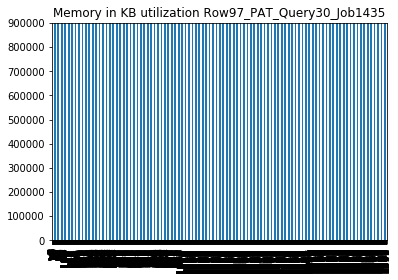

In [44]:
patQ30Row97Dn5Job1435['kbmemused'].plot(kind='bar', title='Memory in KB utilization Row97_PAT_Query30_Job1435', ylim=(0,900000))

In [45]:
patQ30Row97Dn5Job1435

,HostName,TimeStamp,pgpgin/s,pgpgout/s,fault/s,majflt/s,pgfree/s,pgscank/s,pgscand/s,pgsteal/s,...,kbcommit,%commit,kbactive,kbinact,kbdirty,kbswpfree,kbswpused,%swpused,kbswpcad,%swpcad
0,bdw21-13,0,0.0,223.2,1693.6,1.8,885.2,0.0,0.0,0.0,...,91015136,34.22,48564964,118704792,2196,2096500.0,648.0,0.03,44.0,6.79
1,bdw21-13,1,0.0,3372.8,52024.4,2.4,35478.0,0.0,0.0,0.0,...,95783244,36.02,48687172,118704464,340,2096500.0,648.0,0.03,44.0,6.79
2,bdw21-13,2,0.0,2048.8,44638.2,0.0,42644.2,0.0,0.0,0.0,...,95724296,36.00,48605652,118704600,212,2096500.0,648.0,0.03,44.0,6.79
3,bdw21-13,3,0.0,47.2,48107.8,0.0,34013.2,0.0,0.0,0.0,...,95771496,36.01,48794136,118704596,2136,2096500.0,648.0,0.03,44.0,6.79
4,bdw21-13,4,0.0,88.8,63913.6,0.2,41705.6,0.0,0.0,0.0,...,96902160,36.44,48943672,118704904,3252,2096500.0,648.0,0.03,44.0,6.79
5,bdw21-13,5,0.0,297.6,32168.2,0.0,2592.0,0.0,0.0,0.0,...,99402068,37.38,49457084,118772988,74464,2096500.0,648.0,0.03,44.0,6.79
6,bdw21-13,6,0.0,5223.2,31898.0,0.0,50152.4,0.0,0.0,0.0,...,96941964,36.45,49254996,118699924,2180,2096500.0,648.0,0.03,44.0,6.79
7,bdw21-13,7,0.0,300.8,10494.6,0.0,6811.6,0.0,0.0,0.0,...,96951144,36.46,49341876,118699600,5404,2096500.0,648.0,0.03,44.0,6.79
8,bdw21-13,8,0.0,1208.8,5900.0,0.0,6050.8,0.0,0.0,0.0,...,96949720,36.46,49353816,118699620,1400,2096500.0,648.0,0.03,44.0,6.79
9,bdw21-13,9,0.0,106.4,3570.0,0.0,4028.6,0.0,0.0,0.0,...,96943740,36.45,49353192,118699632,1908,2096500.0,648.0,0.03,44.0,6.79


## Major Pauge Faults

In [53]:
patQ30Row97Dn5Job1435.pivot_table('majflt/s','HostName', aggfunc=[np.mean, np.min , np.max, np.std, np.median], margins=True)

,mean,amin,amax,std,median
,majflt/s,majflt/s,majflt/s,majflt/s,majflt/s
HostName,,,,,
bdw21-13,0.469136,0.0,22.0,1.975493,0.0
bdw21-14,0.003106,0.0,0.4,0.029370,0.0
bdw21-15,0.003086,0.0,0.4,0.029280,0.0
bdw21-16,0.003086,0.0,0.4,0.029280,0.0
bdw21-17,0.003086,0.0,0.4,0.029280,0.0
bdw21-18,0.000000,0.0,0.0,0.000000,0.0
bdw21-20,0.000000,0.0,0.0,0.000000,0.0
bdw21-21,0.003086,0.0,0.4,0.029280,0.0


## % Memory Utilization

In [54]:
patQ30Row97Dn5Job1435.pivot_table('%memused','HostName', aggfunc=[np.mean, np.min , np.max, np.std, np.median], margins=True)

,mean,amin,amax,std,median
,%memused,%memused,%memused,%memused,%memused
HostName,,,,,
bdw21-13,66.752747,66.39,66.80,0.050098,66.760
bdw21-14,46.144317,32.10,65.76,9.186332,47.655
bdw21-15,50.748364,31.89,65.41,6.988060,52.115
bdw21-16,49.706204,32.31,65.46,6.925808,49.900
bdw21-17,47.712500,32.55,65.25,7.441009,47.820
bdw21-18,28.271944,27.06,29.13,0.916631,28.930
bdw21-20,33.591000,32.31,34.47,0.942762,34.255
bdw21-21,55.551512,36.82,70.05,6.798141,56.840
